In [19]:
#cloning into the dataset repository available on bitbucket

!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [20]:
#showing files in the dataset

!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
#importing pickle module to unpickle the files in the dataset

import pickle

#opening the pickle files and creating our variables for training,testing and validation data
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)


In [0]:
#splitting the data into our variables

x_train, y_train = train_data['features'],train_data['labels']
x_test, y_test = test_data['features'],test_data['labels']
x_val, y_val = val_data['features'],val_data['labels']

In [23]:
#showing the size of each variable we have

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [24]:
import pandas as pd

data = pd.read_csv('german-traffic-signs/signnames.csv')

print(data)

#from the dataframe printed below we come to know that the dataset has 43 classes.

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

(32, 32, 3)


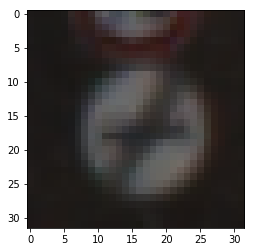

In [25]:
#import matplotlib for visualizing images

import matplotlib.pyplot as plt

#the block of code below just display an image from our data

plt.imshow(x_train[0])
print(x_train[0].shape)

In [0]:
#converting images into gray scale so that the neural network can learn the pattern easily

import cv2

def gray(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

#equalizing images to make the features in the images more porminent for the model to understand

def equalize(img):
  img = cv2.equalizeHist(img)
  return img

def preprocessing(img):
  img = gray(img)
  img = equalize(img)
  #now normalizing the images
  img = img/255
  return img
  

In [0]:
#using map fucntion to iterate through the whole dataset and apply our preprocessing fucntion to every image
import numpy as np

x_train= np.array(list(map(preprocessing,x_train)))
x_val= np.array(list(map(preprocessing,x_val)))
x_test= np.array(list(map(preprocessing,x_test)))

(32, 32)


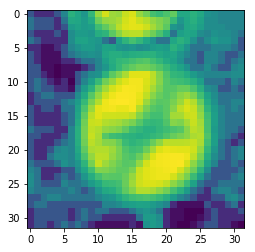

In [28]:
#showing the new preprocessed images

plt.imshow(x_train[0])
print(x_train[0].shape)

In [29]:
#converting the labels into categorical variables
from keras.utils.np_utils import to_categorical

y_cat_train = to_categorical(y_train, 43)
y_cat_test = to_categorical(y_test, 43)
y_cat_val = to_categorical(y_val, 43)


#reshaping the images

x_train = x_train.reshape(34799, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)

print(x_train.shape)



(34799, 32, 32, 1)


In [0]:
#importing keras and required layers to create the model
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))
  

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [31]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)              

In [32]:
model.fit(x_train,y_cat_train,epochs=20,batch_size=400,verbose=1,shuffle=1)

Epoch 1/20
34799/34799 [==============================] - 2s 69us/step - loss: 2.5502 - acc: 0.3239
Epoch 2/20
34799/34799 [==============================] - 2s 57us/step - loss: 0.8929 - acc: 0.7283
Epoch 3/20
34799/34799 [==============================] - 2s 58us/step - loss: 0.4878 - acc: 0.8540
Epoch 4/20
34799/34799 [==============================] - 2s 58us/step - loss: 0.3340 - acc: 0.9011
Epoch 5/20
34799/34799 [==============================] - 2s 59us/step - loss: 0.2588 - acc: 0.9246
Epoch 6/20
34799/34799 [==============================] - 2s 55us/step - loss: 0.2037 - acc: 0.9404
Epoch 7/20
34799/34799 [==============================] - 2s 55us/step - loss: 0.1711 - acc: 0.9495
Epoch 8/20
34799/34799 [==============================] - 2s 57us/step - loss: 0.1396 - acc: 0.9592
Epoch 9/20
34799/34799 [==============================] - 2s 56us/step - loss: 0.1224 - acc: 0.9646
Epoch 10/20
34799/34799 [==============================] - 2s 53us/step - loss: 0.1027 - acc: 0.9699

In [0]:
from sklearn.metrics import classification_report  

In [0]:
prediction = model.predict_classes(x_test)

In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        60
           1       0.92      0.95      0.93       720
           2       0.88      0.98      0.93       750
           3       0.91      0.97      0.94       450
           4       0.94      0.92      0.93       660
           5       0.89      0.82      0.85       630
           6       0.99      0.77      0.86       150
           7       0.93      0.90      0.92       450
           8       0.94      0.88      0.91       450
           9       0.96      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.90      0.93      0.92       420
          12       0.97      0.97      0.97       690
          13       0.99      0.99      0.99       720
          14       0.94      0.97      0.96       270
          15       0.91      0.98      0.94       210
          16       1.00      0.99      1.00       150
          17       0.98    

In [0]:
model.save('street_signs.h5')